VisDrone
Convert Data annotations for Darknet implementation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
model = YOLO(model='yolov8n.pt')
# model = YOLO(model='')

In [ ]:
# results = model.train(data='VisDrone.yaml', pretrained=False, classes=[3], epochs=100, optimizer='SGD', lr0=0.001, weight_decay=0.005, plots=True)
results = model.train(data='VisDrone.yaml', pretrained=True, epochs=50, optimizer='SGD', lr0=0.001, weight_decay=0.005, plots=True)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=VisDrone.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train2/weights/best.pt')

FileNotFoundError: Cannot find file: /content/runs/detect/train/weights/best.pt

In [ ]:
from ultralytics import YOLO
# trained_model = YOLO('/content/drive/MyDrive/csi_5140/trained_models/best_yolov11_all.pt')
trained_model = YOLO("/content/runs/detect/train2/weights/best.pt")

source = "/content/drive/MyDrive/VisDrone2019-DET-test-dev/images"
# source = "/content/datasets/VisDrone/images/test"
predictions = trained_model.predict(source, save=True)
for prediction in predictions:
  boxes = prediction.boxes  # Boxes object for bounding box outputs
  masks = prediction.masks  # Masks object for segmentation masks outputs
  keypoints = prediction.keypoints  # Keypoints object for pose outputs
  probs = prediction.probs  # Probs object for classification outputs
  obb = prediction.obb  # Oriented boxes object for OBB outputs
  # prediction.show()  # display to screen


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1610 /content/drive/MyDrive/VisDrone2019-DET-test-dev/images/0000006_00159_d_0000001.jpg: 384x640 33 cars, 2 vans, 10 trucks, 40.1ms
image 2/1610 /content/drive/MyDrive/VisDrone2019-DET-test-dev/images/0000006_00611_d_0000002.jpg: 384x640 1 people, 34 cars, 3 vans, 1 truck, 3 motors, 6.3ms
image 3/1610 /content/drive/MyDrive/VisDrone2019-DET-test-dev/images/0000006_01111_d_0000003.jpg: 384x640 2 pedestrians, 11 cars, 1 van, 2 trucks, 3 motors, 


Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage0_Conv_features.png... (16/16)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage1_Conv_features.png... (32/32)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage2_C2f_features.png... (32/32)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage3_Conv_features.png... (32/64)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage4_C2f_features.png... (32/64)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage5_Conv_features.png... (32/128)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage6_C2f_features.png... (32/128)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage7_Conv_features.png... (32/256)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage8_C2f_features.png... (32/256)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage9_SPPF_features.png... (32/256)
Saving /content/runs/detect/

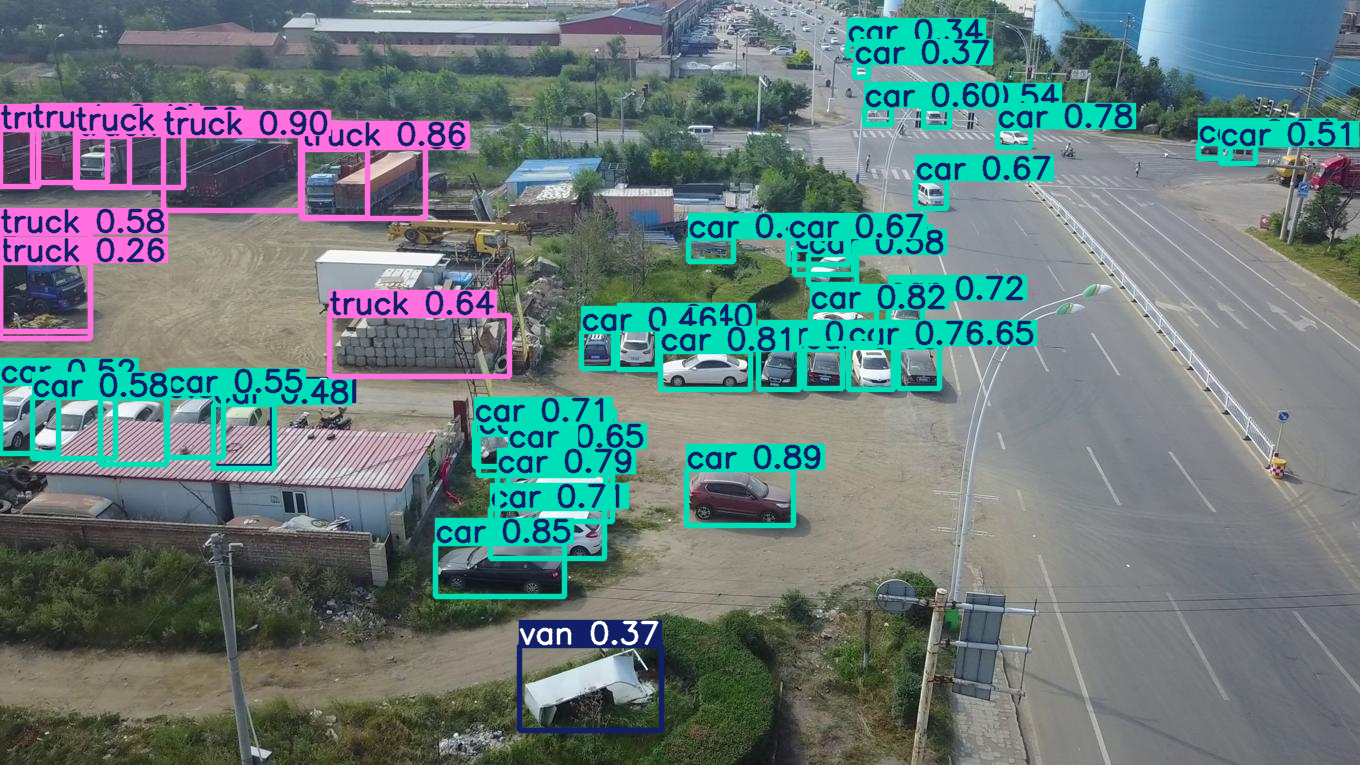

In [ ]:
# trained_model = YOLO('/content/drive/MyDrive/csi_5140/trained_models/best_yolov11_all.pt')
trained_model= YOLO('/content/runs/detect/train2/weights/best.pt')
source = "/content/drive/MyDrive/VisDrone2019-DET-test-dev/images/0000006_00159_d_0000001.jpg"
predictions = trained_model.predict(source, save=True, visualize=True)
for prediction in predictions:
  boxes = prediction.boxes  # Boxes object for bounding box outputs
  masks = prediction.masks  # Masks object for segmentation masks outputs
  keypoints = prediction.keypoints  # Keypoints object for pose outputs
  probs = prediction.probs  # Probs object for classification outputs
  obb = prediction.obb  # Oriented boxes object for OBB outputs
  prediction.show()  # display to screen

In [ ]:
# model = YOLO("/content/drive/MyDrive/csi_5140/trained_models/best_yolov11_all.pt")
model = YOLO("/content/runs/detect/train2/weights/best.pt")
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list containing mAP50-95 for each category

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2638.4±708.8 MB/s, size: 126.7 KB)
val: Scanning /content/datasets/VisDrone/labels/val.cache... 548 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 548/548 765.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 35/35 3.8it/s 9.1s
                   all        548      38759      0.365      0.287      0.274      0.156
            pedestrian        520       8844      0.366      0.315      0.288      0.118
                people        482       5125      0.451      0.191      0.224     0.0769
               bicycle        364       1287      0.184     0.0567     0.0493     0.0161
                   car        515      14064      0.538      0.731      0.707      0.471
                   van        421      

array([    0.11844,     0.07691,    0.016062,      0.4713,       0.207,     0.16615,    0.088563,    0.057596,     0.25596,     0.10692])

In [ ]:
results = model.val(data="VisDrone.yaml", plots=True)
print(results.confusion_matrix.to_df())

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3008.0±802.2 MB/s, size: 120.8 KB)
val: Scanning /content/datasets/VisDrone/labels/val.cache... 548 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 548/548 1.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 35/35 3.8it/s 9.2s
                   all        548      38759      0.365      0.287      0.274      0.156
            pedestrian        520       8844      0.366      0.315      0.288      0.118
                people        482       5125      0.451      0.191      0.224     0.0769
               bicycle        364       1287      0.184     0.0567     0.0493     0.0161
                   car        515      14064      0.538      0.731      0.707      0.471
                   van        421       1975      0.339      0.335      0.304      0.207
                 truck        26

In [ ]:
from google.colab import files
files.download('/content/runs/detect/val')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/runs/detect/val.zip /content/runs/detect/val

In [ ]:
files.download('/content/runs/detect/val.zip')

In [ ]:
!zip -r /content/runs/detect/train.zip /content/runs/detect/train

In [ ]:
files.download('/content/runs/detect/train.zip')